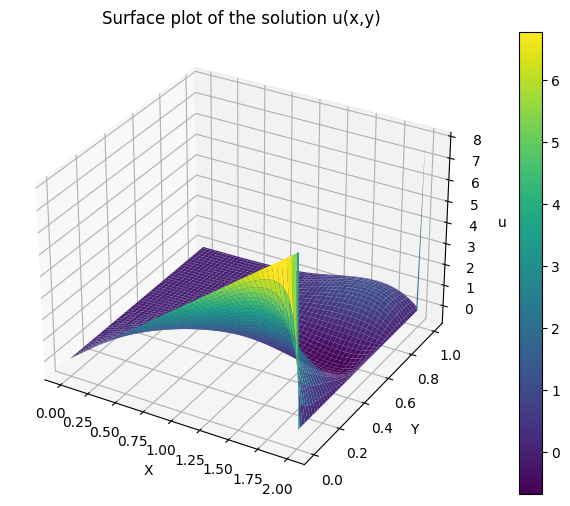

(838, 0.0009986723334465264)

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the number of grid points and the convergence criterion for a much smaller grid
N = 100
epsilon = 1e-3  # Relaxing convergence criterion

# Initialize the grid
u = np.zeros((N, N))
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Apply boundary conditions
u[0, :] = beta * y  # u(x=0) = beta * y
u[-1, :] = beta * y  # u(x=2) = beta * y
# u(y=0) is already initialized to 0

# Precompute the constant f(x,y) for x >= 1
f = np.zeros((N, N))
for j in range(N):
    for i in range(N//2, N):  # Start at x=1, which is halfway across the grid
        f[j, i] = 40 * np.sin(alpha * y[j]) * (1 - x[i])

# Perform Gauss-Seidel iteration
max_diff = np.inf
iterations = 0

while max_diff > epsilon:
    max_diff = 0
    for j in range(1, N-1):
        for i in range(1, N-1):
            u_old = u[j, i]
            # Apply the Gauss-Seidel update
            if x[i] < 1:
                u[j, i] = 0.25 * (u[j, i+1] + u[j, i-1] + u[j+1, i] + u[j-1, i])
            else:
                u[j, i] = 0.25 * (u[j, i+1] + u[j, i-1] + u[j+1, i] + u[j-1, i] - dx**2 * f[j, i])
            
            # Compute the change and track the maximum
            diff = abs(u[j, i] - u_old)
            max_diff = max(max_diff, diff)

    # Apply the Neumann boundary condition at y=1
    for i in range(1, N-1):
        u[N-1, i] = u[N-2, i] - dy * gamma * u[N-2, i]
    
    iterations += 1

# Create the meshgrid for plotting
X, Y = np.meshgrid(x, y)

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u')
ax.set_title('Surface plot of the solution u(x,y)')
plt.colorbar(surf)
plt.show()

# Return the number of iterations and the maximum difference for output
iterations, max_diff


In [31]:
from scipy.optimize import fsolve
import numpy as np

# Define the transcendental equation
gamma = 5
transcendental_eq = lambda k: k * np.tanh(k) + gamma

# We will use an array of initial guesses based on the typical behavior of tanh function
initial_guesses = np.linspace(1, 15, 30)  # Start with guesses between 1 and 15

# Use fsolve to find solutions near the initial guesses
k_solutions = np.unique([fsolve(transcendental_eq, k0)[0] for k0 in initial_guesses])

# Remove any complex solutions and potential duplicates due to numerical tolerance
k_solutions = np.unique(k_solutions[np.isreal(k_solutions)])

k_solutions


c:\Users\Aaron\.virtualenvs\eng_math-tuc281Ze\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\Aaron\.virtualenvs\eng_math-tuc281Ze\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([-6.17151545e-03, -4.61217054e-03, -2.69069161e-03, -1.06596515e-03,
       -9.52480684e-04, -9.05630567e-04, -6.78443262e-04, -5.34304524e-04,
       -4.03364200e-04, -2.39451773e-04, -2.23944457e-04, -1.66879027e-04,
       -7.12877594e-06,  8.13285711e-05,  1.70183277e-04,  4.29887061e-04,
        5.85822804e-04,  6.12175866e-04,  6.65249720e-04,  7.54289095e-04,
        8.03158264e-04,  8.72455812e-04,  8.90316939e-04,  9.40420915e-04,
        1.17112756e-03,  1.22405141e-03,  1.39388112e-03,  2.00829337e-03,
        2.80489687e-03,  3.44674550e-03])

In [32]:
# Redefine the transcendental equation taking into account the physical context where k > 0
transcendental_eq_positive = lambda k: k * np.tanh(k) - gamma

# We need to find the roots in the positive domain, we will find the first few roots
# by checking where the sign changes which typically indicates a root in between
k_values = np.linspace(0, 15, 1500)  # Increase density to find sign changes
sign_changes = np.where(np.diff(np.sign(transcendental_eq_positive(k_values))))[0]

# Use fsolve again, but now only in intervals where a sign change occurs
k_roots = []
for index in sign_changes:
    # Use the midpoint in the interval as the initial guess for fsolve
    k_guess = (k_values[index] + k_values[index + 1]) / 2
    k_root = fsolve(transcendental_eq_positive, k_guess)[0]
    # Check if the solution is indeed a root and not previously found due to numerical precision
    if np.isclose(transcendental_eq_positive(k_root), 0) and all(np.abs(k_root - np.array(k_roots)) > 1e-5):
        k_roots.append(k_root)

k_roots = np.sort(k_roots)  # Sort the roots for better readability
k_roots


array([5.00045361])

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

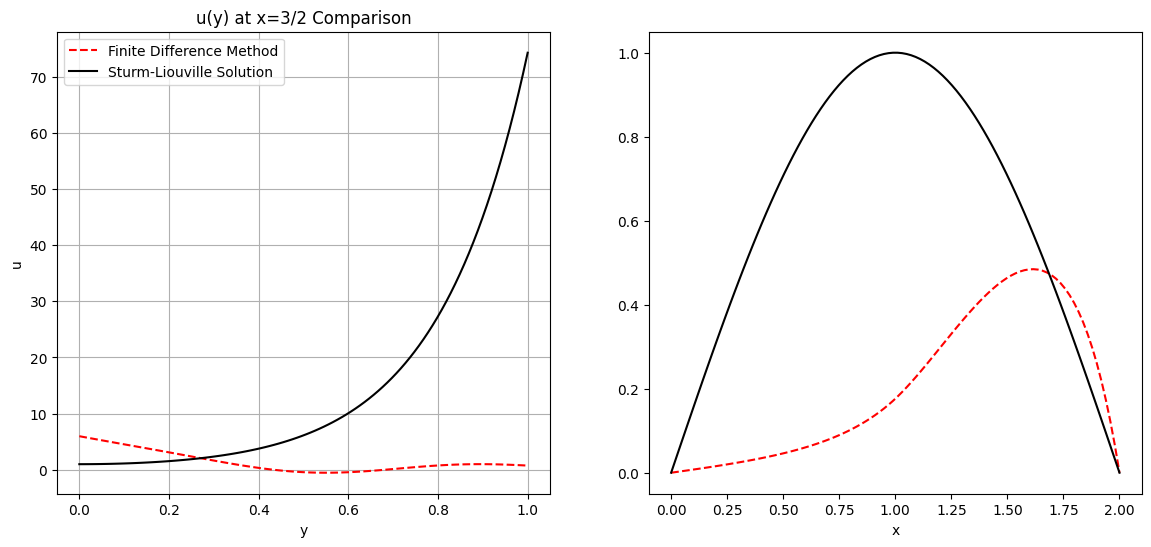

In [35]:
# Parameters given for the problem
alpha = 9
beta = 8
gamma = 5

# Set the number of grid points and the convergence criterion
N = 100
epsilon = 1e-3  # Convergence criterion

# Initialize the grid
u_fd = np.zeros((N, N))
x_fd = np.linspace(0, 2, N)
y_fd = np.linspace(0, 1, N)
dx_fd = x_fd[1] - x_fd[0]
dy_fd = y_fd[1] - y_fd[0]

# Apply boundary conditions
u_fd[0, :] = beta * y_fd  # u(x=0) = beta * y
u_fd[-1, :] = beta * y_fd  # u(x=2) = beta * y
# u(y=0) is already initialized to 0

# Precompute the constant f(x,y) for x >= 1
f_fd = np.zeros((N, N))
for j in range(N):
    for i in range(N//2, N):  # Start at x=1, which is halfway across the grid
        f_fd[j, i] = 40 * np.sin(alpha * y_fd[j]) * (1 - x_fd[i])

# Perform Gauss-Seidel iteration
max_diff_fd = np.inf
iterations_fd = 0

while max_diff_fd > epsilon:
    max_diff_fd = 0
    for j in range(1, N-1):
        for i in range(1, N-1):
            u_old_fd = u_fd[j, i]
            # Apply the Gauss-Seidel update
            if x_fd[i] < 1:
                u_fd[j, i] = 0.25 * (u_fd[j, i+1] + u_fd[j, i-1] + u_fd[j+1, i] + u_fd[j-1, i])
            else:
                u_fd[j, i] = 0.25 * (u_fd[j, i+1] + u_fd[j, i-1] + u_fd[j+1, i] + u_fd[j-1, i] - dx_fd**2 * f_fd[j, i])
            
            # Compute the change and track the maximum
            diff_fd = abs(u_fd[j, i] - u_old_fd)
            max_diff_fd = max(max_diff_fd, diff_fd)

    # Apply the Neumann boundary condition at y=1
    for i in range(1, N-1):
        u_fd[N-1, i] = u_fd[N-2, i] - dy_fd * gamma * u_fd[N-2, i]
    
    iterations_fd += 1

# Extracting the finite difference solution at the specified lines
x_index_fd_3_2 = int(1.5 / dx_fd)  # Index for x=3/2
y_index_fd_3_4 = int(0.75 / dy_fd)  # Index for y=3/4

fd_u_y_at_x_3_2 = u_fd[:, x_index_fd_3_2]
fd_u_x_at_y_3_4 = u_fd[y_index_fd_3_4, :]

# For the Sturm-Liouville solution, calculate the eigenfunction for x=3/2 and y=3/4
# Using the eigenvalue k from the previous calculation
k_sl = 5.00045361  # Eigenvalue from previous calculation
sl_u_y_at_x_3_2 = np.cosh(k_sl * y_fd)  # This would be the Sturm-Liouville solution at x=3/2
sl_u_x_at_y_3_4 = np.sin((np.pi/2) * x_fd)  # Assuming n=1 for the first eigenfunction

# Now let's plot the comparison
plt.figure(figsize=(14, 6))

# Plot for u(y) at x=3/2
plt.subplot(1, 2, 1)
plt.plot(y_fd, fd_u_y_at_x_3_2, 'r--', label='Finite Difference Method')
plt.plot(y_fd, sl_u_y_at_x_3_2, 'k-', label='Sturm-Liouville Solution')
plt.xlabel('y')
plt.ylabel('u')
plt.title('u(y) at x=3/2 Comparison')
plt.legend()
plt.grid(True)

# Plot for u(x) at y=3/4
plt.subplot(1, 2, 2)
plt.plot(x_fd, fd_u_x_at_y_3_4, 'r--', label='Finite Difference Method')
plt.plot(x_fd, sl_u_x_at_y_3_4, 'k-', label='Sturm-Liouville Solution')
plt.xlabel('x')
plt.ylabel
